# Correlation analysis between the apartments

<div class="alert alert-success" role="alert">
    <strong>Summary:</strong><br> This notebook calculates the correlation between each apartment to form groups with similar consumption patterns.  
    The first section of the notebook determines the correlation between apartments using the time-series method over a five-day period.  
    The second section works out the correlation using the hourly average of the different apartments over a ten-day span.  
    The third part analyses the correlation of each apartment with a resample of 3-hour per day. It explores then the relationship between the apartments over a period of the day. This section is still based on the analysis of a three-hourly-average over the span of ten-day.  
</div>

The `os` module is employed to get the names of the entries by manipulating the path. To get more information, you have the option to refer to the library's documentation. Even though, this notebook will provide explanations for the [functions used.](https://docs.python.org/3/library/os.html)  
The `pandas` module facilitates data analysis and the use of dataframes. You can find the library's documentation [there.](https://pandas.pydata.org/docs/)   
The `numpy` module is instrumental in manipulating matrices and tables, serving for numerical calculations. You can find the library's documentation [there.](https://numpy.org/doc/stable/)  
The seaborn module is employed to visualize statistical data. You can find the library's documentation [there.](https://seaborn.pydata.org/api.html)  
Lastly, the `matplotlib.pyplot` module is utilized for plotting values to visualize the data.Lastly, the matplotlib.pyplot module is utilized for plotting values to visualize the data. You can find the library's documentation [there.](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) 

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

The required Domestic Hot Water (DHW) files end with "-IECS", this designation indicates data related to DHW.  
The `os` module is utilized to compile a list of DHW data for all apartments.

In [2]:
folder = r"../Data/"
files = os.listdir(folder)
#Get a list of the different files named IECS
list_IECS = [file for file in files if '-IECS' in file]   
list_IECS.sort()

Using the `pandas` module, we read the CSV files containing the listed information from the previous step. Then, we use the `resample` function within the `pandas` module to resample the data to a 10-min interval.

In [3]:
data = {} #Creation of a dictionary
for file in list_IECS:
    df = pd.read_csv(folder + file) #Read the csv file
    ts = df.set_index('0')['Value']     # DataFrame -> TimeSeries
    ts.index = pd.to_datetime(ts.index, unit='s')   # index to secondes
    ts = ts.resample("10Min").mean()    # resample 10 min
    data[file[:-4]] = ts 

We proceed to create a dataframe with the previously acquired data.  
Preprocessing our data we remove the NaN value that can create some noises in the study.

In [4]:
df = pd.DataFrame(data)
df = df[~df.isnull().any(axis=1)]  # remove the row with Nan Value

Conversion of the water consumption from l/s to l/h.

In [5]:
df=df*3600
#print(df)

## Time-series analysis

<div class="alert alert-info">
<strong>Details :</strong><br>
Starting by getting the data of the five-day period, resample the data for one-hour and then work out the correlation between the apartment over the consecutive five days.
</div>

The dataframe 'df1' extracts the data of five consecutive day as specified from the main dataframe 'df', that contains the two years data.  
Following this, we employ the `resample` function from the `pandas` module to obtain data at an hourly interval, computed as the hourly average for each apartment.

In [6]:
df1=df['2020-12-07 00:00:00' : '2020-12-12 00:00:00']
#print(df1)
df1h = df1.resample("H").mean() 

The `corr` function from the `pandas` module works out the correlation matrix for the apartments over the five consecutive days.  
To visualize this matrix, we employ the `heatmap` function of the `seaborn` module. This function assigns colors to values based on a specified scale and then plots them into a rectangular heatmap.    
The results are plotted by using the `show` function from the `matplotlib.pyplot` module.

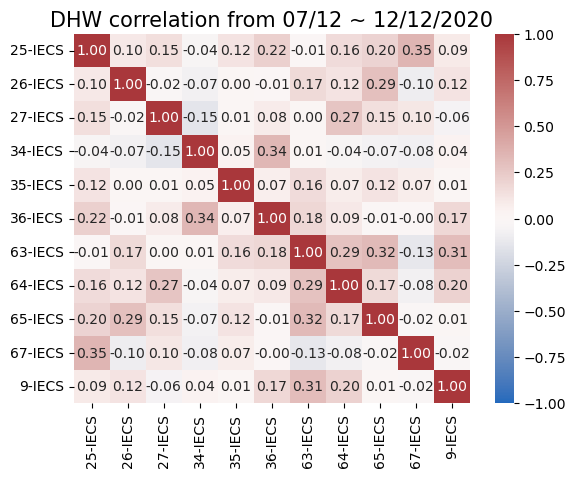

In [7]:
df1h_corr = df1h.corr() # Correlation matrice of df1h
sn.heatmap(df1h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f') #Creating a scale to visualize the correlation
plt.title('DHW correlation from 07/12 ~ 12/12/2020', fontsize=15) #Add a title to the figure
plt.show() #Plot the figure

Our goal is to assess whether adding one more day to the timestep affects the consistency of the correlation matrix. We aim to osbserve if the values remain stable over time. However, the obtained results are insufficient, prompting a shift to our second hypothesis for further investigation.

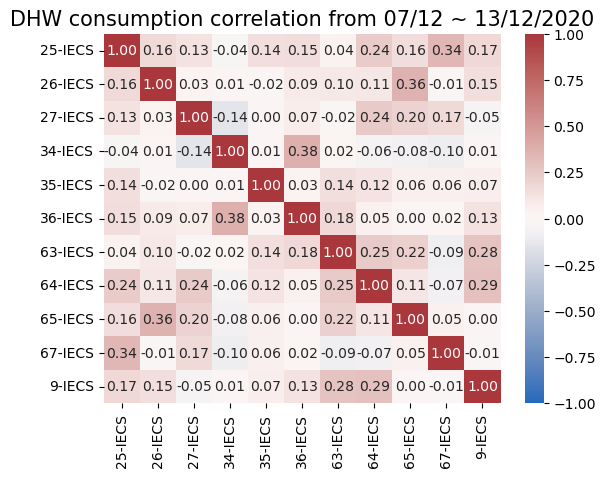

In [8]:
df2=df['2020-12-07 00:00:00' : '2020-12-13 00:00:00']
df2h = df2.resample("H").mean() 
df2h_corr = df2h.corr()
sn.heatmap(df2h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW consumption correlation from 07/12 ~ 13/12/2020', fontsize=15)
plt.show()

Our goal there is to determine if shifting the month of the analysis affects the consistency of the correlation matrix. The objective is to determine if the correlation coefficient remains stable through the month.

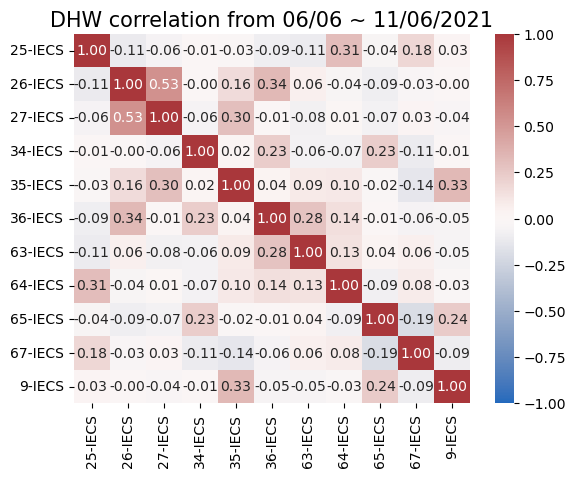

In [9]:
df3=df['2021-06-06 00:00:00' : '2021-06-11 00:00:00']
df3h = df3.resample("H").mean() 
df3h_corr = df3h.corr()
sn.heatmap(df3h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 06/06 ~ 11/06/2021', fontsize=15)
plt.show()

As evident the observed correlation coefficients fluctuate significantly compared to the previous matrix and remain below 0.5.  
Consequently, the first hypothesis is rejected.

## Hour average analysis

<div class="alert alert-info">
<strong>Details :</strong><br>
    Our second hypothesis is that the apartement can exhibits correlation with each other over a specific timeframe, using average values. The size of the hot water tank will depend by the duration required to observe a correlation between the apartments. We hypothesize that this correlation will manifest over a span of 10 days with a 1-hour sampling interval.
    Starting by getting the data of the ten-day period, resample the data for one-hour. Subsequently, we calculate the hourly-average of each apartments over the ten-day span. The resulting data is visualized through plotting to observe it. Then the correlation analysis is made to compare each apartments together.
</div>


We aim to observe our data from an hourly perspective, to achieve this, we use the `resample` funtion to resample the data to one-hour interval.  
We then employ the `groupby` function of the `pandas` module to work out the average values for each apartment from 0 AM to 12 PM using every hour over the ten-days period. We are doing an hour average of ten-days.  

In [10]:
df4=df['2020-12-07 00:00:00' : '2020-12-17 00:00:00']
df4h = df4.resample("H").mean()
df4h = df4h.groupby(df4h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df4h)

Getting the max, min and standard deviation values for each apartments. It will be used to observe the range of DHW.  
Then we use the `plot` function of the `matplotlib.pyplot` module to visualize the hourly-average value of the ten-days period.

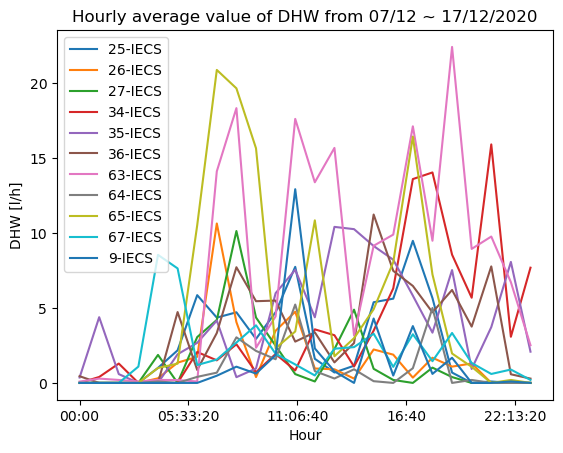

In [11]:
df4h_max=df4h.max()
df4h_min=df4h.min()
df4h_standard_deviation=df4h.std()


df4h_minus_std=df4h-df4h_standard_deviation
#print(df4h_minus_std)

df4h_plus_std=df4h+df4h_standard_deviation
#print(df4h_plus_std)

#Plot every mean values

ac= df4h.plot(xlabel='Hour', ylabel='DHW [l/h]')
ac.set_title('Hourly average value of DHW from 07/12 ~ 17/12/2020')
plt.show()

We want to represent the consumption range for each apartment across different hours, along with their respective standard deviations.  
To achieve it, we convert the data into `numpy` format.  
This conversion is necessary because the `fill_between` function works with `numpy` values and one-dimensional arrays.  
Consequently, the data must be transformed into `numpy` format and applied individually to each apartment using this function.  
To observe only one range, we can comment the code line for the other apartments which is `plt.fill_between`. We will be able to see the range of one apartment and the average line of the other.

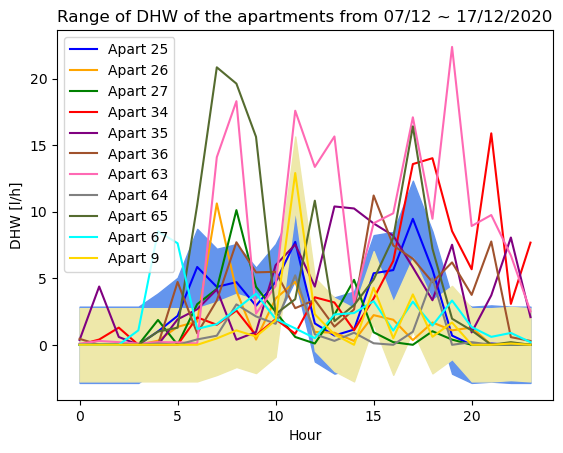

In [12]:

x=np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23 ]) #x represents the hour of the day where the value are taken

#Plot the range of the apartment 25 with its standard deviation and mean value.
plt.plot(x,df4h['25-IECS'].to_numpy(), label='Apart 25', color='blue', ) #Plot the mean value for each apartment
plt.fill_between(x, df4h_minus_std['25-IECS'].to_numpy(), df4h_plus_std['25-IECS'].to_numpy(), color='cornflowerblue') #Plot the standard deviation bands

#Repeat it for each apartments
plt.plot(x,df4h['26-IECS'].to_numpy(), label='Apart 26',color='orange' ) 
#plt.fill_between(x, df4h_minus_std['26-IECS'].to_numpy(), df4h_plus_std['26-IECS'].to_numpy(), color='bisque') 

plt.plot(x,df4h['27-IECS'].to_numpy(), label='Apart 27',color='green' ) #Plot the mean value for each apartment
#plt.fill_between(x, df4h_minus_std['27-IECS'].to_numpy(), df4h_plus_std['27-IECS'].to_numpy(), color='lightgreen') 

plt.plot(x,df4h['34-IECS'].to_numpy(), label='Apart 34',color='red' ) 
#plt.fill_between(x, df4h_minus_std['34-IECS'].to_numpy(), df4h_plus_std['34-IECS'].to_numpy(), color='lightcoral') 

plt.plot(x,df4h['35-IECS'].to_numpy(), label='Apart 35',color='purple' )
#plt.fill_between(x, df4h_minus_std['35-IECS'].to_numpy(), df4h_plus_std['35-IECS'].to_numpy(), color='plum') 

plt.plot(x,df4h['36-IECS'].to_numpy(),label='Apart 36', color='sienna' ) 
#plt.fill_between(x, df4h_minus_std['36-IECS'].to_numpy(), df4h_plus_std['36-IECS'].to_numpy(), color='sandybrown') 

plt.plot(x,df4h['63-IECS'].to_numpy(),label='Apart 63', color='hotpink' ) 
#plt.fill_between(x, df4h_minus_std['63-IECS'].to_numpy(), df4h_plus_std['63-IECS'].to_numpy(), color='lightpink') 

plt.plot(x,df4h['64-IECS'].to_numpy(), label='Apart 64',color='grey' ) 
#plt.fill_between(x, df4h_minus_std['64-IECS'].to_numpy(), df4h_plus_std['64-IECS'].to_numpy(), color='lightgrey') 

plt.plot(x,df4h['65-IECS'].to_numpy(), label='Apart 65',color='darkolivegreen' ) 
#plt.fill_between(x, df4h_minus_std['65-IECS'].to_numpy(), df4h_plus_std['65-IECS'].to_numpy(), color='darkseagreen') 

plt.plot(x,df4h['67-IECS'].to_numpy(), label='Apart 67',color='cyan' ) 
#plt.fill_between(x, df4h_minus_std['67-IECS'].to_numpy(), df4h_plus_std['67-IECS'].to_numpy(), color='lightcyan') 

plt.plot(x,df4h['9-IECS'].to_numpy(), label='Apart 9', color='gold' ) 
plt.fill_between(x, df4h_minus_std['9-IECS'].to_numpy(), df4h_plus_std['9-IECS'].to_numpy(), color='palegoldenrod') 

plt.legend()
plt.xlabel('Hour')
plt.ylabel('DHW [l/h]')
plt.title('Range of DHW of the apartments from 07/12 ~ 17/12/2020')
plt.show()

The `corr` function from the `pandas` module works out the correlation matrix for the apartments over the ten-day average.  
To visualize this matrix, we employ the `heatmap` function of the `seaborn` module. This function assigns colors to values based on a specified scale and then plots them into a rectangular heatmap.    
The results are plotted by using the `show` function from the `matplotlib.pyplot` module.

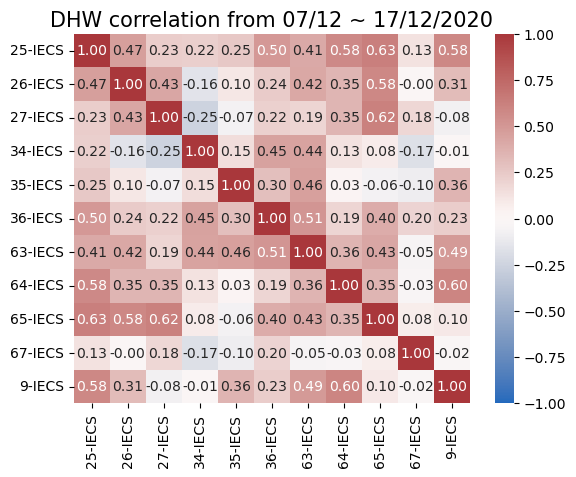

In [13]:
df4h_corr = df4h.corr()
sn.heatmap(df4h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/12 ~ 17/12/2020', fontsize=15)
plt.show()

Our goal is still to assess whether adding one more day to the dataset affects the consistency of the correlation matrix. We aim to osbserve if the values remain stable over time.

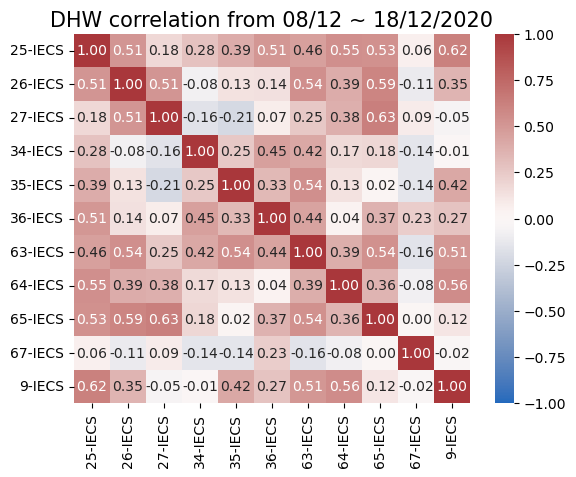

In [14]:
df5=df['2020-12-08 00:00:00' : '2020-12-18 00:00:00']
df5h = df5.resample("H").mean()
df5h = df5h.groupby(df5h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df5h)
df5h_corr = df5h.corr()
sn.heatmap(df5h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/12 ~ 18/12/2020', fontsize=15)
plt.show()

Our goal is once again to determine if shifting the month of the analysis affects the consistency of the correlation matrix. The objective is to determine if the correlation coefficient remains stable through the month.

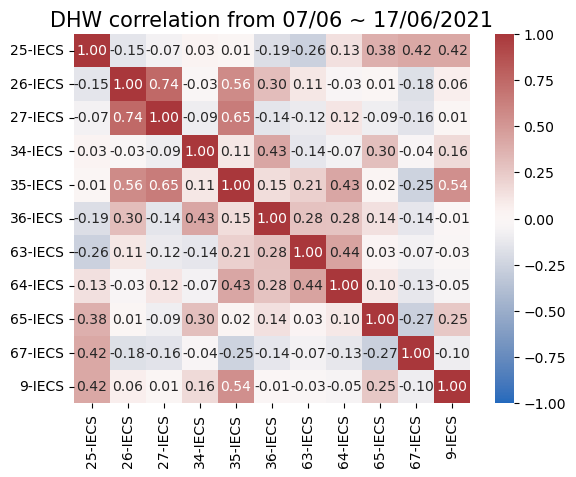

In [15]:
df6=df['2021-06-07 00:00:00' : '2021-06-17 00:00:00']
df6h = df6.resample("H").mean()
df6h = df6h.groupby(df6h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df5h)
df6h_corr = df6h.corr()
sn.heatmap(df6h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/06 ~ 17/06/2021', fontsize=15)
plt.show()

Our goal is still to assess whether adding one more day to the dataset of another month affects the consistency of the correlation matrix. We aim to osbserve if the values remain stable over time even when shifting the month.

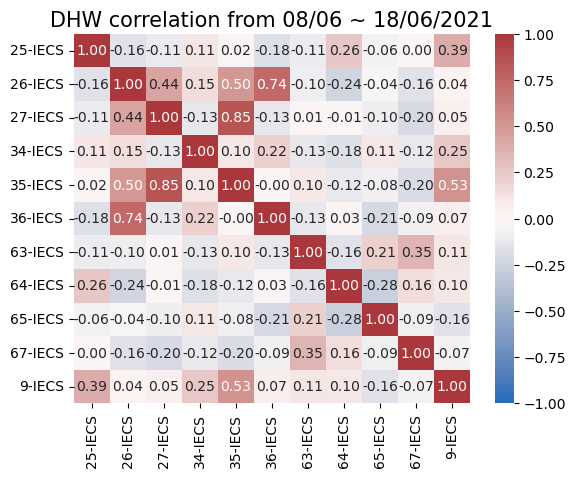

In [16]:
df7=df['2021-06-08 00:00:00' : '2021-06-18 00:00:00']
df7h = df7.resample("H").mean()
df7h = df7h.groupby(df7h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df7h)
df7h_corr = df7h.corr()
sn.heatmap(df7h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/06 ~ 18/06/2021', fontsize=15)
plt.show()

We observe that the coefficient are not consistent. We shift our hypothesis to the third one.

# Morning and afternoon resample analysis _ 3 hours

<div class="alert alert-info">
<strong>Details :</strong><br>
    Continuing our previous investigation, we hypothesize that the correlation will manifest over a span of 10 days with a 3-hour sampling interval. 
    Starting by getting the data of the ten-day period, resample the data for three-hour. Subsequently, we calculate the three hourly-average of each apartments over the ten-day span. The resulting data is visualized through plotting to observe it. Then the correlation analysis is made to compare each apartments together.
    Using a resample of three-hour allow us to visualize the morning and afternoon information
</div>

 As previously done, we resample our data for a three-hour sampling, then we use the `groupby` function of the `pandas` module to get the average value of the three-hour sampling over ten-days.  
 Then we can plot the results to visualize it.  
 Lastly, we use the `corr` function to determine the correlation coefficients of this investigation.

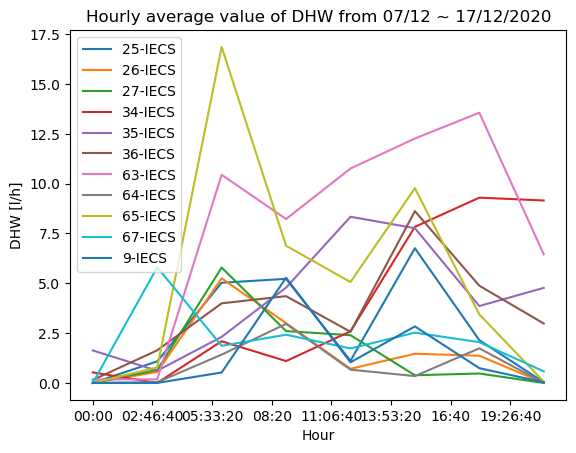

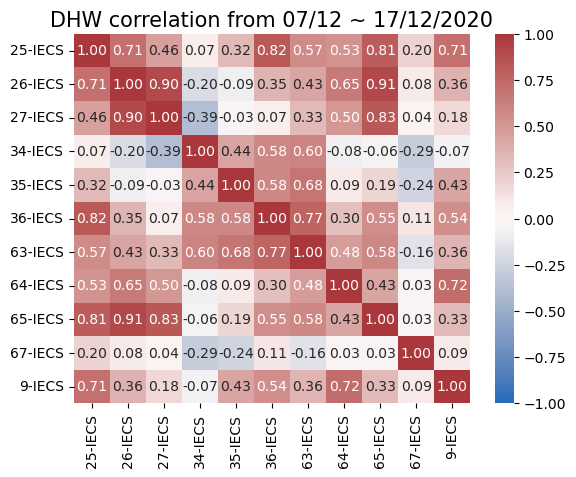

In [17]:
df8=df['2020-12-07 00:00:00' : '2020-12-17 00:00:00']
df8h = df8.resample("3H").mean()
df8h = df8h.groupby(df8h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df8h)

ac1= df8h.plot(xlabel='Hour', ylabel='DHW [l/h]')
ac1.set_title('Hourly average value of DHW from 07/12 ~ 17/12/2020')
plt.show()

df8h_corr = df8h.corr()
sn.heatmap(df8h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/12 ~ 17/12/2020', fontsize=15)
plt.show()

We want to assess whether adding one more day to the dataset affects the consistency of the correlation matrix. We aim to osbserve if the values remain stable over time.

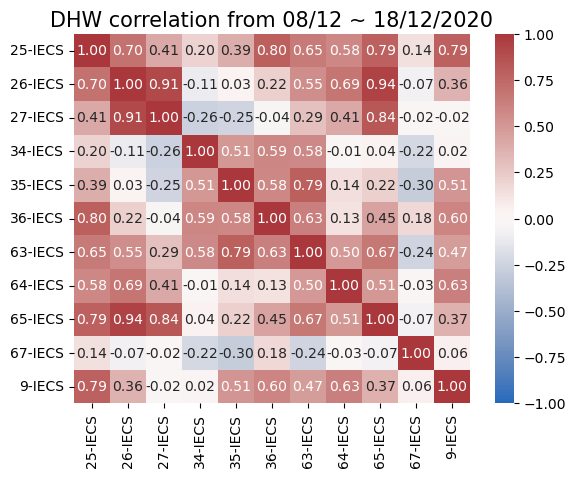

In [18]:
df9=df['2020-12-08 00:00:00' : '2020-12-18 00:00:00']
df9h = df9.resample("3H").mean()
df9h = df9h.groupby(df9h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df9h)

df9h_corr = df9h.corr()
sn.heatmap(df9h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/12 ~ 18/12/2020', fontsize=15)
plt.show()

Our goal is once again to determine if shifting the month of the analysis affects the consistency of the correlation matrix. The objective is to determine if the correlation coefficient remains stable through the month. We shift our month to June.

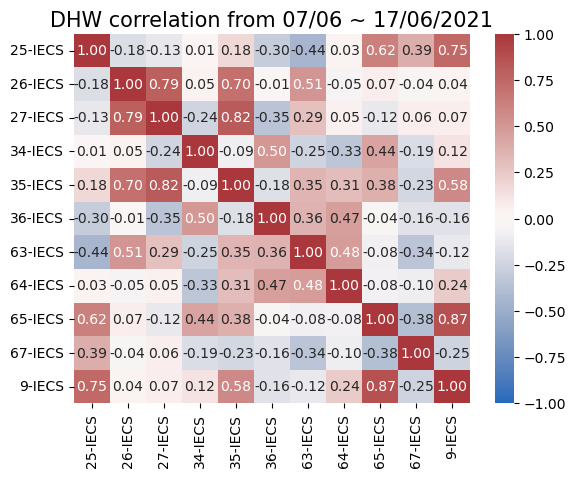

In [19]:
df10=df['2021-06-07 00:00:00' : '2021-06-17 00:00:00']
df10h = df10.resample("3H").mean()
df10h = df10h.groupby(df10h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df10h)

df10h_corr = df10h.corr()
sn.heatmap(df10h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 07/06 ~ 17/06/2021', fontsize=15)
plt.show()

We want to assess whether adding one more day to the dataset affects the consistency of the correlation matrix of another month. We aim to osbserve if the values remain stable over time.

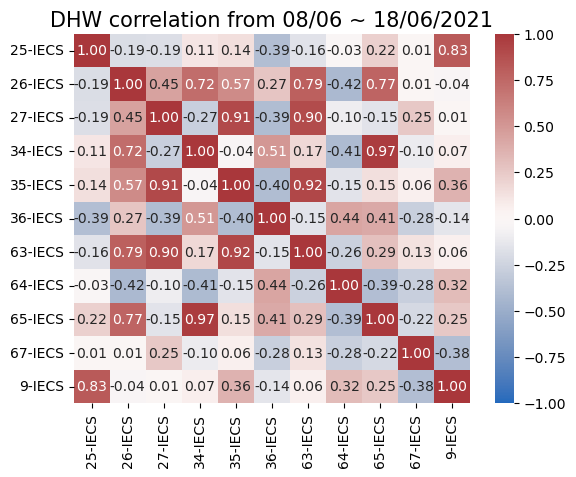

In [20]:
df11=df['2021-06-08 00:00:00' : '2021-06-18 00:00:00']
df11h = df11.resample("3H").mean()
df11h = df11h.groupby(df11h.index.time).mean() #Get the mean values of the ten days to get an average on one day
#print(df11h)
df11h_corr = df11h.corr()
sn.heatmap(df11h_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', fmt='.2f')
plt.title('DHW correlation from 08/06 ~ 18/06/2021', fontsize=15)
plt.show()

In conclusion, although the coefficients are above 0.5, their constant fluctuations suggest that the apartments cannot maintain a stable correlation with each other. Consequently, our hypothesis is refuted.  
We then direct our focus to the `Correlation analysis between the apartment to themselves` code, which contains the code associated to the second main hypothesis of the investigation.